[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/drbob-richardson/stat220/blob/main/Assignments/Stat_220_HW1.ipynb)


**Problem 1**. Give an example of a variable that is (a) categorical; (b) quantitative; (c) discrete; (d) continuous.



Categorical: Species of flower
Quantative: Number of students in class
Discrete: Result of a dice roll
Continuous: Temperature

**Problem 2**. Analyze the Carbon_West data file using the following code.

In [21]:
import pandas as pd
carbon_west = pd.read_fwf("https://stat4ds.rwth-aachen.de/data/Carbon_West.dat")

In [22]:
carbon_west

,Nation,CO2
0,Albania,2.0
1,Australia,15.4
2,Austria,6.9
3,Belgium,8.3
4,Bosnia,6.2
5,Bulgaria,5.9
6,Canada,15.1
7,Croatia,4.0
8,Cyprus,5.3
9,Czech,9.2


Part a. Construct a histogram of CO2 emissions. 

Text(0.5, 1.0, 'CO2 Emissions')

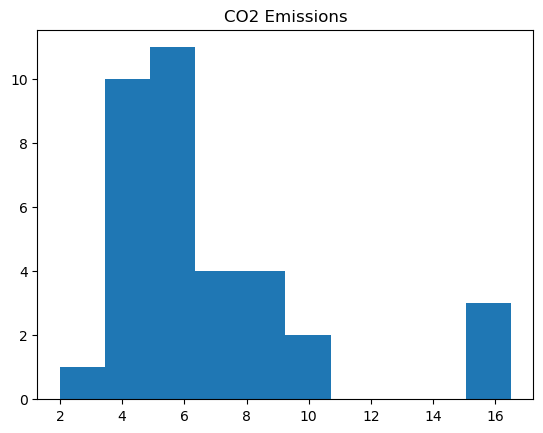

In [25]:
import matplotlib.pyplot as plt
plt.hist(carbon_west['CO2'])
plt.title('CO2 Emissions')

Part b. Find the mean, median, and standard deviation. 

In [28]:
print(f"The mean is {carbon_west['CO2'].mean()}")
print(f"The median is {carbon_west['CO2'].median()}")
print(f"The standard deviation is {carbon_west['CO2'].std()}")

The mean is 6.717142857142858
The median is 5.9
The standard deviation is 3.356949395462714


**Problem 3**. Read in the murder data set using the following code. The variable murder is the murder rate (per 100,000 population) for each state in the U.S. in 2017 according to the FBI Uniform Crime Reports. At first, do not use the observation for D.C. (DC). 

In [29]:
murders = pd.read_fwf("https://stat4ds.rwth-aachen.de/data/Murder.dat")

In [34]:
murders.columns

Index(['state', 'murder'], dtype='object')

Part a. Find the mean and standard deviation for murders without D.C.

In [39]:
murders_no_dc = murders[murders['state'] != 'DC']
print(f'The mean is {murders_no_dc["murder"].mean()}')
print(f'The standard deviation is {murders_no_dc["murder"].std()}')

The mean is 4.874
The standard deviation is 2.586291174793806


Part b. Find the five-number  summary without D.C. 

In [42]:
murders_no_dc["murder"].describe()

count    50.000000
mean      4.874000
std       2.586291
min       1.000000
25%       2.625000
50%       4.850000
75%       6.175000
max      12.400000
Name: murder, dtype: float64

Part c. Now include the observation for D.C. and recalculate the mean, median, and five-number summary. What is affected more by this outlier: The mean or the median? The range or the inter-quartile range?

In [49]:
summary = murders.describe()
print(summary)
range = murders['murder'].max() - murders['murder'].min()
print(f"Range is {range}")
iqr = murders['murder'].quantile(.75) - murders['murder'].quantile(.25)
print(f"IQR is {iqr}")

          murder
count  51.000000
mean    5.252941
std     3.725391
min     1.000000
25%     2.650000
50%     5.000000
75%     6.450000
max    24.200000
Range is 23.2
IQR is 3.8


mean no dc = 4.874
mean dc = 5.252
diff is around .4

median no dc = 4.85
median dc = 5
diff is .15

The mean changes more than median with the outlier

range no dc = 11
range dc = 23.2
diff = 12.2

iqr no dc is around 4
iqr dc is 3.8
diff is around .2

The range changes more than iqr with the outlier

**Problem 4**. Read in the Houses data file using the following code.  The variables include price (thousands of dollars), size (square feet), tax bill (dollars), number of bathrooms, number of bedrooms, and whether the house is new (1 = yes, 0 = no) for 100 home sales in Gainesville, Florida. Let
y = selling price and x = size of home.

In [50]:
houses = pd.read_fwf("https://stat4ds.rwth-aachen.de/data/Houses.dat")

In [51]:
houses.columns

Index(['case', 'price', 'size', 'new', 'taxes', 'bedrooms', 'baths'], dtype='object')

Part a. Construct a scatterplot between square feet and price of a home. 

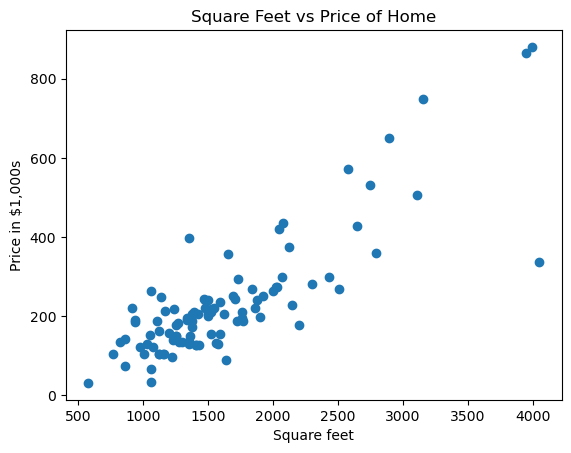

In [55]:
plt.scatter(houses['size'], houses['price'])
plt.title('Square Feet vs Price of Home')
plt.xlabel('Square feet')
plt.ylabel('Price in $1,000s')
plt.show()

Part b. Find the correlation between the two variables.

In [59]:
import numpy as np
print(f"The correlation between house size and price is {houses['size'].corr(houses['price'])}")

The correlation between house size and price is 0.8337847885586537


Part c. Find and plot the regression line on top of the scatterplot. 

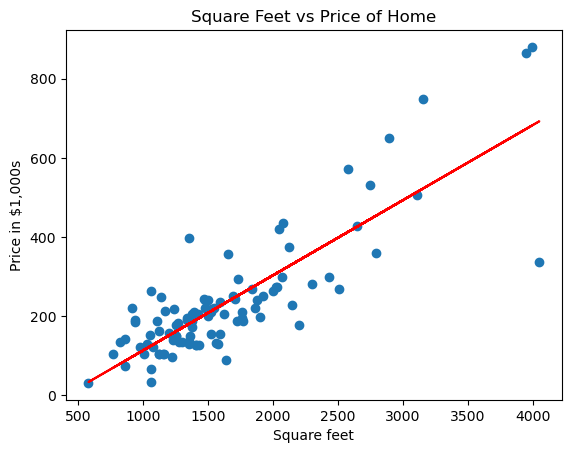

In [62]:
plt.scatter(houses['size'], houses['price'])
plt.title('Square Feet vs Price of Home')
plt.xlabel('Square feet')
plt.ylabel('Price in $1,000s')

slope, intercept = np.polyfit(houses['size'], houses['price'], deg=1)
regression_line = houses['size'] * slope + intercept

plt.plot(houses['size'], regression_line, color='red')

plt.show()

Part d. Create a side by side boxplot of price comparing homes that are new and homes that are not new. 

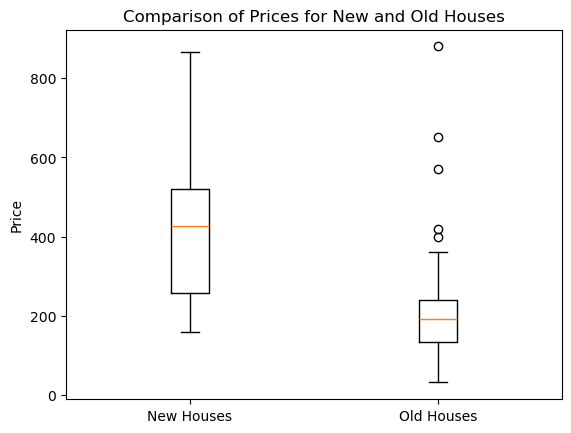

In [75]:
new = houses[houses['new'] == 1]
old = houses[houses['new'] == 0]
plt.boxplot([new['price'], old['price']], positions=[1,2])

plt.xticks([1, 2], ['New Houses', 'Old Houses'])
plt.ylabel('Price')
plt.title('Comparison of Prices for New and Old Houses')
plt.show()


Part e. What is the relationship between size and price.  Justify your answer using the plots created. Do the same for the relationship between price and whether or not a house is new, again using the plot to justify your answer.

Size and price has a strong positive correlation of over .8 which can be seen in the scatter plot. 

Old houses tend to be cheaper except when considering the outliers. But most of the distrobution as seen by the iqr of old houses shows that they tend to be cheaper.

**Problem 1.22**. Using the Happy data file read in by the following code. Construct the contingency table relating marital status and happiness. 

In [89]:
happy = pd.read_csv("https://stat4ds.rwth-aachen.de/data/Happy.dat", delim_whitespace=True)

/var/folders/9x/4qztln3d1szdd5py9k83qs_r0000gn/T/ipykernel_46860/4083616314.py:1: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  happy = pd.read_csv("https://stat4ds.rwth-aachen.de/data/Happy.dat", delim_whitespace=True)


In [90]:
pd.crosstab(happy['marital'], happy['happiness'])

happiness,1,2,3
marital,,,
1,432,504,61
2,92,282,103
3,124,409,135
